<a href="https://colab.research.google.com/github/Jeyakumar30/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Titanic Survival Prediction***


#**Introduction**


The sinking of the Titanic in 1912 was a tragic event that claimed the lives of many passengers. In this data science exploration, I delve into the Titanic dataset, aiming to build a predictive model that can answer the question: "**What sorts of people were more likely to survive?**"

My analysis encompasses various steps, from data loading and cleaning to model training and evaluation. By leveraging machine learning techniques, I seek to uncover patterns within the dataset that shed light on the factors influencing survival.

#**Data Science Process**

#I. Setting the Research Goal

##**Research Goal:**
To investigate and understand the factors influencing survival rates among passengers on the Titanic, utilizing machine learning techniques to build a predictive model.

**Key Objectives:**

1. Preprocessing
2. Feature Importance
3. Exploratory Data Analysis
4. Predictive Modeling
5. Model Evaluation
6. Interpretation of results

#II. Data Retrieval


The dataset for this analysis was sourced from Kaggle, a platform known for hosting diverse datasets and fostering collaborative data science projects. The dataset, titled "Titanic Survival Prediction Dataset" encapsulates information about passengers aboard the Titanic, which sank in 1912.

To acquire the dataset, a Kaggle account was created, and access was gained to the Titanic dataset through the Kaggle competition page. The dataset consist of a file: "Titanic-Dataset.csv". The CSV file is composed of the following attributes: socio-economic class, age, gender, siblings/spouses aboard, parents/children aboard, ticket details, fare, cabin, and embarkation port.


Subsequently, the data was imported into a Google Colab Notebook environment for analysis, visualizations, and insights into the exploration of Titanic survival predictions.

###Importing Required Libraries


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from joblib import dump, load

###Loading Data

In [ ]:
titanic_data = pd.read_csv('/content/drive/MyDrive/Data Science Projects/CodSoft Internship/Titanic-Dataset.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Understanding Data


1. **PassengerId:** A unique identifier for each passenger.
2. **Survived:** Binary indicator (0 or 1) representing whether the passenger survived (1) or not (0).
3. **Pclass (Ticket Class):** Socio-economic class of the passenger (1st, 2nd, or 3rd).
4. **Name:** Full name of the passenger, including title (e.g., Mr., Mrs., Miss).
5. **Sex:** Gender of the passenger (male or female).
6. **Age:** Age of the passenger.
7. **SibSp:** Number of siblings/spouses aboard the Titanic.
8. **Parch:** Number of parents/children aboard the Titanic.
9. **Ticket:** Ticket number.
10. **Fare:** Passenger fare.
11. **Cabin:** Cabin number where the passenger stayed.
12. **Embarked:** Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

#III. Data Preparation

##1. Data Cleansing

###Handling Missing Values

 Let us check the total number of missing values in each column.

In [ ]:
# Checking for missing values in the entire dataset
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


It seems **Age** and **Cabin** Column contains significant number of Null values. Lets try to fix them.



In [ ]:
# Filling missing values in 'Age' with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

Almost 75% of observations present in **Cabin** column is null. So, better we can remove the entire column as it is not required for predicting dependent variable.

In [ ]:
# Droping the 'Cabin' column
titanic_data.drop('Cabin', axis=1, inplace=True)

Since there are only two missing values in **Embarked** column. So, I considered filling them with the most common port of embarkation.

In [ ]:
# Checking the distribution of values in 'Embarked'
print(titanic_data['Embarked'].value_counts())


S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
# Filled missing values in 'Embarked' with the most common port
most_common_port = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'].fillna(most_common_port, inplace=True)

print(titanic_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


###Checking for Outlier

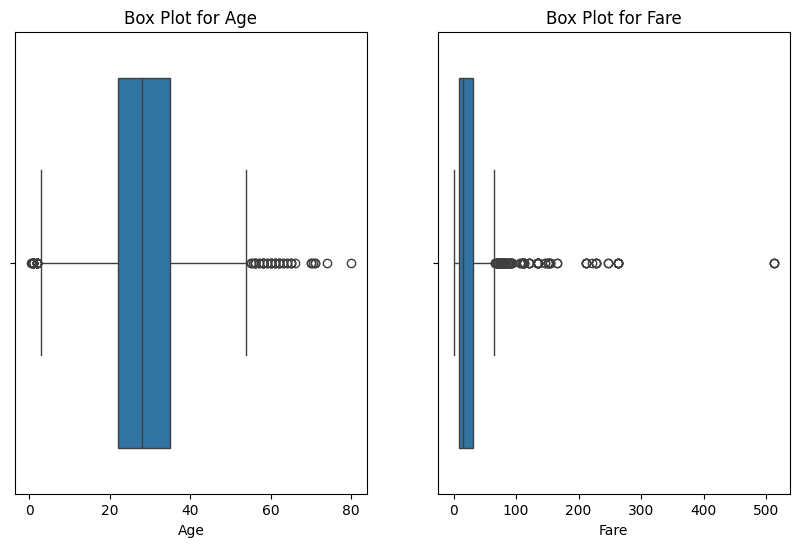

In [ ]:
#Checking for Outliers
plt.figure(figsize=(10, 6))

# Creating box plots for 'Age' and 'Fare'
plt.subplot(1, 2, 1)
sns.boxplot(x='Age', data=titanic_data)
plt.title('Box Plot for Age')

plt.subplot(1, 2, 2)
sns.boxplot(x='Fare', data=titanic_data)
plt.title('Box Plot for Fare')

plt.show()


In [ ]:
# Removing rows with Fare > 300
titanic_data = titanic_data[titanic_data['Fare'] < 300]
titanic_data.shape #Only one observation discarded

(888, 11)

Now, the data cleaning is over. Let's move on to the next step of data processing.

##2. Data Transformation

###Reducing Number of variables

Let us remove the variables that are not needed for our analysis and making prediction as we already did for **Cabin** column.

The following columns are not required:

1. PassengerId
2. Name
3. Ticket

Let's try to remove them





In [ ]:
# Dropping unnecessary columns
titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

<ipython-input-41-7b5e887a4f88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


###Creating Dummies


In [ ]:
# One-hot encode categorical variables
titanic_data = pd.get_dummies(titanic_data, columns=['Sex'], drop_first=True)

titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)


1 in Embarked_Q indicates Q port for Embarkment

1 in Embarked_S indicates S port and

0 in both the cases indicates C port.

In [ ]:
titanic_data.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
886,0,2,27.0,0,0,13.00,1,0,1
887,1,1,19.0,0,0,30.00,0,0,1
888,0,3,28.0,1,2,23.45,0,0,1
889,1,1,26.0,0,0,30.00,1,0,0
890,0,3,32.0,0,0,7.75,1,1,0


In [ ]:
titanic_data.shape

(888, 9)

##3. Combining Data

Since we don't have any other additional datasets/tables to combine together. So we can proceed to the next phase of data science process.

#IV. Data Exploration

###Descriptive Statistical Analysis

Let us perform descriptive statistical analysis on our dataset for measuring Central tendency, Spread/dispersion and Shape of distribution using `describe()` function.

In [ ]:
print(titanic_data.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare  \
count  888.000000  888.000000  888.000000  888.000000  888.000000  888.000000   
mean     0.381757    2.313063   29.341408    0.524775    0.381757   30.582164   
std      0.486091    0.834007   13.037026    1.104186    0.806949   41.176366   
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.895800   
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200   
75%      1.000000    3.000000   35.000000    1.000000    0.000000   30.771850   
max      1.000000    3.000000   80.000000    8.000000    6.000000  263.000000   

         Sex_male  Embarked_Q  Embarked_S  
count  888.000000  888.000000  888.000000  
mean     0.647523    0.086712    0.727477  
std      0.478011    0.281571    0.445508  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%   

###Visualizations
Using visualizations to understand the distribution of features and relationships between them by creating various techniques like histograms, scatter plots, count plots, etc.

Let us plot histogram to find the distribution of age among passengers.

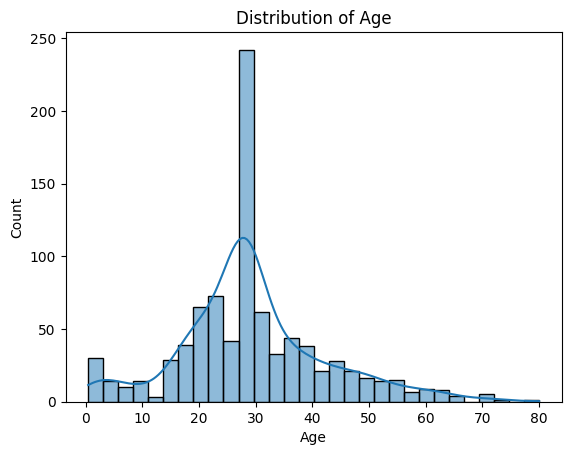

In [ ]:
# Histogram for Age Distribution
sns.histplot(titanic_data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

 Count plot to visualize the distribution of survived and not survived passengers.

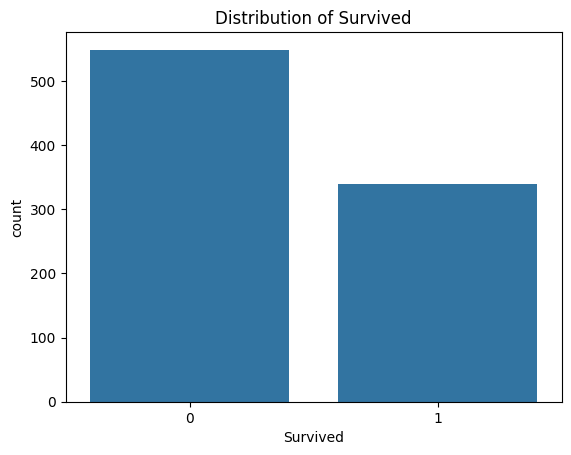

In [ ]:
# Count plot for 'Survived'
sns.countplot(x='Survived', data=titanic_data)
plt.title('Distribution of Survived')
plt.show()

Bar plot to find the rate of survival by Pclass

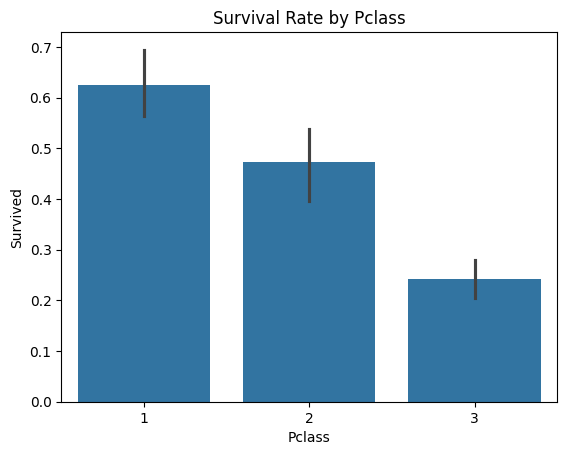

In [ ]:
# Example: Percentage bar plot for 'Pclass'
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival Rate by Pclass')
plt.show()

Horizontal bar chart for Count Vs Class

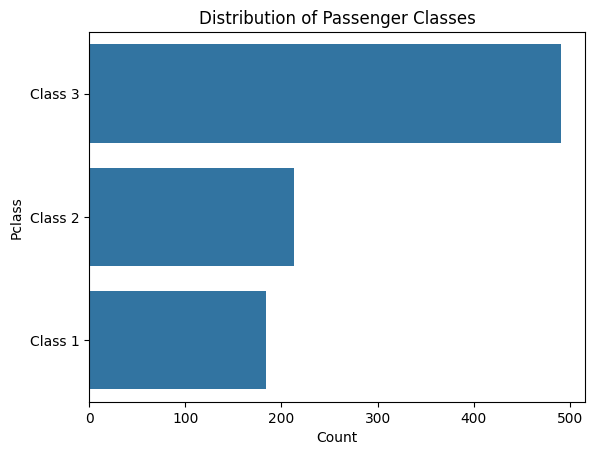

In [ ]:
sns.barplot(x=titanic_data['Pclass'].value_counts(), y=['Class 3', 'Class 2', 'Class 1'])
plt.title('Distribution of Passenger Classes')
plt.xlabel('Count')
plt.ylabel('Pclass')
plt.show()

To explore the correlation between features, a correlation matrix can be used which will give us an idea of how different features are related.

In [ ]:
correlation = titanic_data.corr()
print(correlation)

            Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.334068 -0.067081 -0.033395  0.082157  0.261742   
Pclass     -0.334068  1.000000 -0.338998  0.080937  0.018212 -0.604960   
Age        -0.067081 -0.338998  1.000000 -0.232732 -0.172623  0.098801   
SibSp      -0.033395  0.080937 -0.232732  1.000000  0.415141  0.211816   
Parch       0.082157  0.018212 -0.172623  0.415141  1.000000  0.263910   
Fare        0.261742 -0.604960  0.098801  0.211816  0.263910  1.000000   
Sex_male   -0.545899  0.132881  0.081203 -0.114799 -0.247003 -0.222361   
Embarked_Q  0.004981  0.220331 -0.030954 -0.026861 -0.081351 -0.129578   
Embarked_S -0.143763  0.066029 -0.004231  0.066452  0.060792 -0.132543   

            Sex_male  Embarked_Q  Embarked_S  
Survived   -0.545899    0.004981   -0.143763  
Pclass      0.132881    0.220331    0.066029  
Age         0.081203   -0.030954   -0.004231  
SibSp      -0.114799   -0.026861    0.066452  
Parch      -0.247003   -

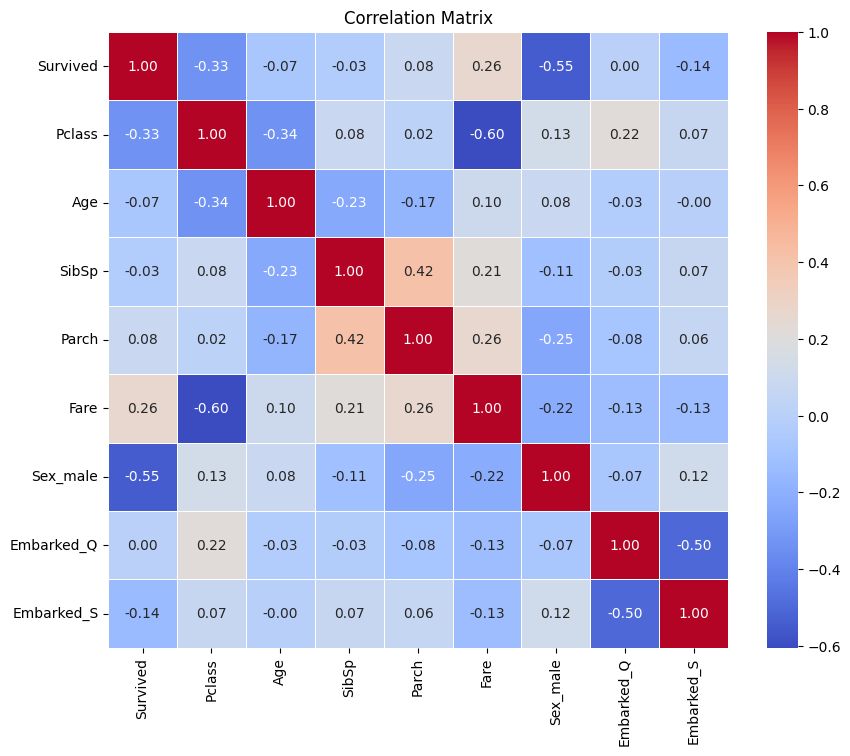

In [ ]:
# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

#V. Data Modeling

The next few steps in this phase are crucial for building a predictive model and it involves preparing the data for model training, selecting a model, training the model, and evaluating its performance.

##1. Model and Variable Selection

Let `X` be the new dataframe which comprises of independent variables and `y` be the dependent or target variable of our `titanic_data`.

In [ ]:
# Defining features (X) and target variable (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

Let us split the dataset into Train and Test sets in 80 : 20 ratio.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let us train our data with different machine learning algorithms and will choose one best performing model among them.

In [ ]:
#Random State
np.random.seed(42)

# Initializing and Training the RandomForest model
randomForest = RandomForestClassifier(random_state=42)
randomForest.fit(X_train, y_train)

# Initializing and Training the Logistic Regression model
logReg = LogisticRegression(random_state=42, max_iter=1000)
logReg.fit(X_train, y_train)

# Initializing and Training the Decision Trees model
decisionTree = DecisionTreeClassifier(random_state=42)
decisionTree.fit(X_train, y_train)

# Initializing and Training the Support Vector Machines (SVM) model
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Initializing and Training the Gaussian Naive Bayes model
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

# Initializing and Training the K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

##2. Model Execution

Let us test all the built models using test data.

In [ ]:
# Predictions on the testing set
y_pred_random = randomForest.predict(X_test)

y_pred_logReg = logReg.predict(X_test)

y_pred_decisionTree = decisionTree.predict(X_test)

y_pred_svm = svm.predict(X_test)

y_pred_gaussian = gaussian.predict(X_test)

y_pred_knn = knn.predict(X_test)

##3. Model Diagnostic and Comparison

Let us evaluate the model's performance on the testing set using metrics such as accuracy, precision, recall, and F1 score.

In [ ]:
#Performance matrices for Random Forest
train_accuracy = accuracy_score(y_train, randomForest.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_random)
classification_rep = classification_report(y_test, y_pred_random)

print("Random Forest")
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:")
print(classification_rep)

Random Forest
Train Accuracy: 0.9830985915492958
Test Accuracy: 0.8202247191011236

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       104
           1       0.77      0.81      0.79        74

    accuracy                           0.82       178
   macro avg       0.81      0.82      0.82       178
weighted avg       0.82      0.82      0.82       178



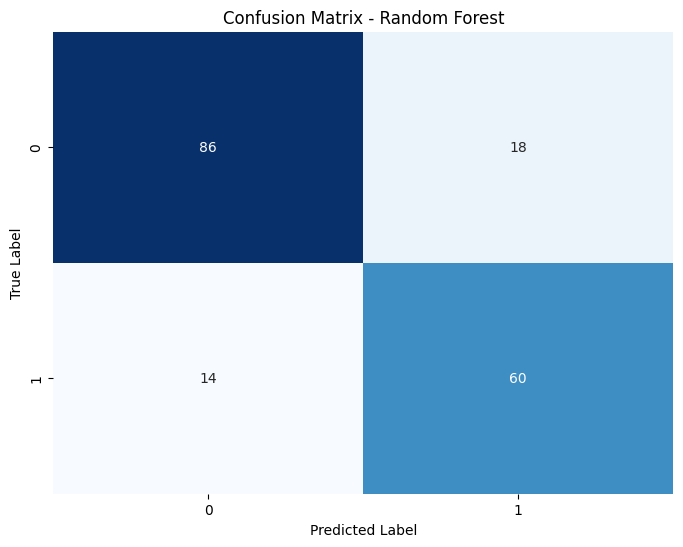

In [ ]:
# Confusion matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_random)

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#Performance matrices for Logistic Regression

train_accuracy = accuracy_score(y_train, logReg.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_logReg)
classification_rep = classification_report(y_test, y_pred_logReg)

print("Logistic Regression")
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:")
print(classification_rep)

Logistic Regression
Train Accuracy: 0.7915492957746478
Test Accuracy: 0.8146067415730337

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       104
           1       0.76      0.81      0.78        74

    accuracy                           0.81       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178



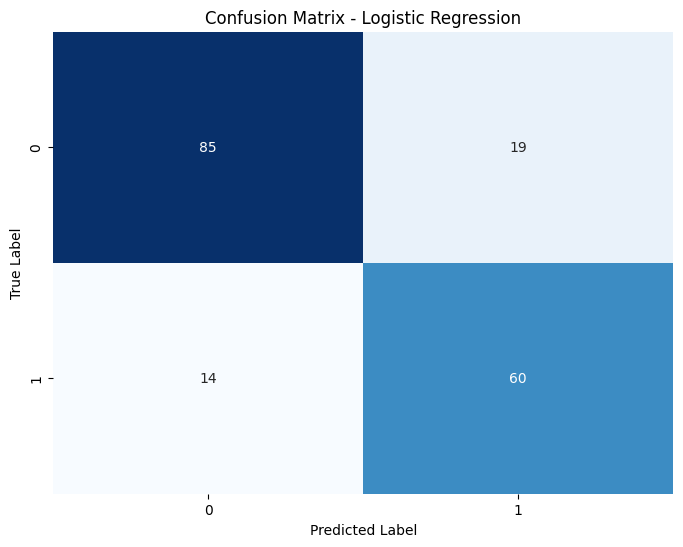

In [ ]:
# Confusion matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred_logReg)

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#Performance matrices for Decision Tree Classifier
train_accuracy = accuracy_score(y_train, decisionTree.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_decisionTree)
classification_rep = classification_report(y_test, y_pred_decisionTree)

print("Decision Tree Classifier")
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:")
print(classification_rep)

Decision Tree Classifier
Train Accuracy: 0.9830985915492958
Test Accuracy: 0.7808988764044944

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       104
           1       0.73      0.76      0.74        74

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.78       178
weighted avg       0.78      0.78      0.78       178



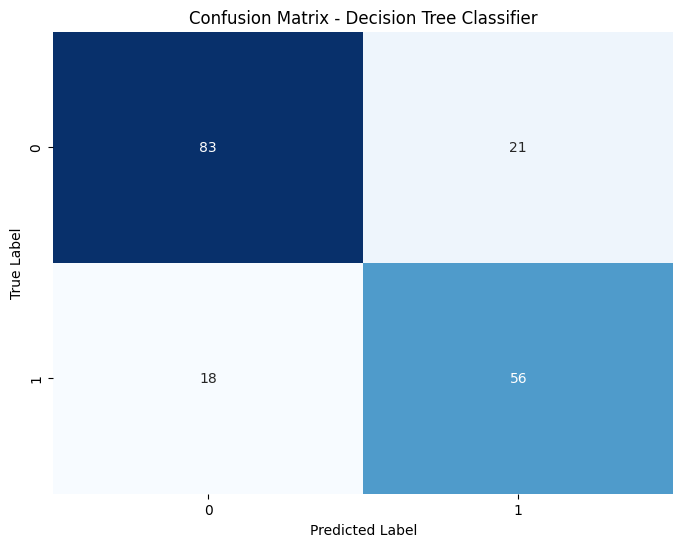

In [ ]:
# Confusion matrix for Decision Tree Classifier
conf_matrix = confusion_matrix(y_test, y_pred_decisionTree)

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#Performance matrices for Support Vector Machines (Support Vector Classification)
train_accuracy = accuracy_score(y_train, svm.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_svm)
classification_rep = classification_report(y_test, y_pred_svm)

print("Support Vector Machines (Support Vector Classification)")
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:")
print(classification_rep)

Support Vector Machines (Support Vector Classification)
Train Accuracy: 0.6873239436619718
Test Accuracy: 0.6348314606741573

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.90      0.74       104
           1       0.66      0.26      0.37        74

    accuracy                           0.63       178
   macro avg       0.64      0.58      0.56       178
weighted avg       0.64      0.63      0.59       178



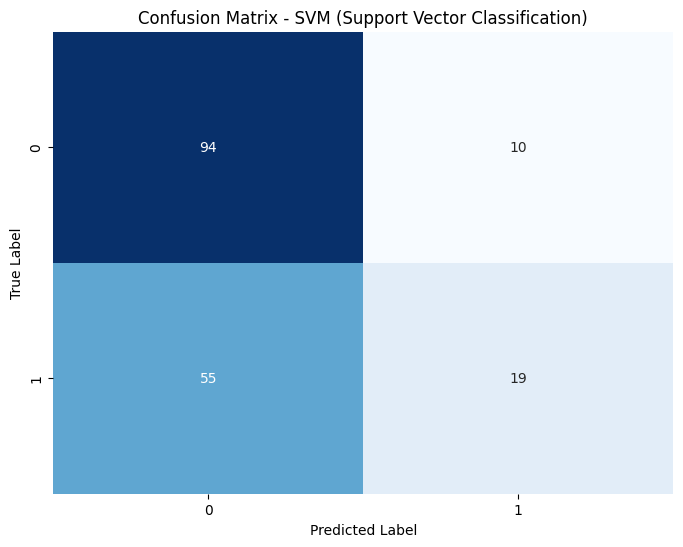

In [ ]:
# Confusion matrix for SVM
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM (Support Vector Classification)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#Performance matrices for Gaussian Naive Bayes
train_accuracy = accuracy_score(y_train, gaussian.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_gaussian)
classification_rep = classification_report(y_test, y_pred_gaussian)

print("Gaussian Naive Bayes")
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:")
print(classification_rep)

Gaussian Naive Bayes
Train Accuracy: 0.7845070422535211
Test Accuracy: 0.7921348314606742

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       104
           1       0.73      0.80      0.76        74

    accuracy                           0.79       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.79      0.79       178



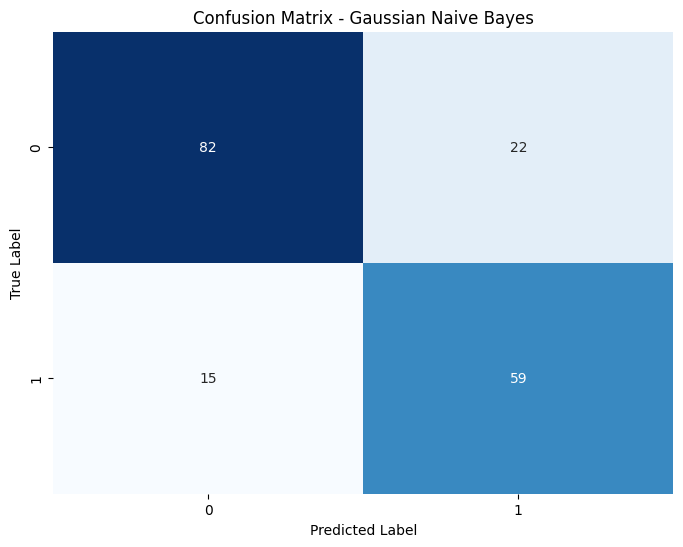

In [ ]:
# Confusion matrix for Gaussian Naive Bayes
conf_matrix = confusion_matrix(y_test, y_pred_gaussian)

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#Performance matrices for k-Nearest Neighbors
train_accuracy = accuracy_score(y_train, knn.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_knn)
classification_rep = classification_report(y_test, y_pred_knn)

print("k-Nearest Neighbors")
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:")
print(classification_rep)

k-Nearest Neighbors
Train Accuracy: 0.7887323943661971
Test Accuracy: 0.7359550561797753

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       104
           1       0.74      0.57      0.64        74

    accuracy                           0.74       178
   macro avg       0.74      0.71      0.72       178
weighted avg       0.74      0.74      0.73       178



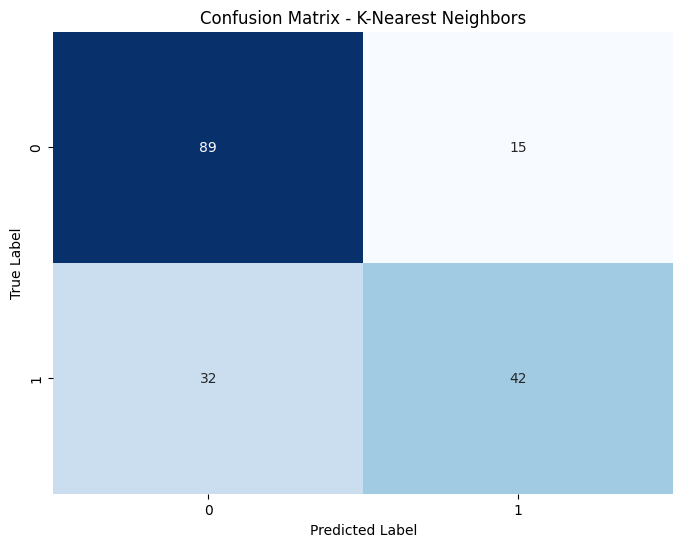

In [ ]:
# Confusion matrix for KNN
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#VI. Automation and Presentation

##Automation

From the above comparisons between trained models, the best performing model selected for automation is Random Forest.

In [ ]:
def make_predictions(new_data):
    predictions = randomForest.predict(new_data)
    return predictions

# Example use case
new_data = pd.DataFrame({
    'Pclass': [1, 3],
    'Age': [25, 30],
    'SibSp': [1, 0],
    'Parch': [0, 1],
    'Fare': [7.5, 50.0],
    'Sex_male': [1, 0],
    'Embarked_Q': [1, 0],
    'Embarked_S': [0, 0]
})

predictions = make_predictions(new_data)
print(new_data)
print("\nResults: 0 - Not Survived; 1 - Survived")
print(predictions)

   Pclass  Age  SibSp  Parch  Fare  Sex_male  Embarked_Q  Embarked_S
0       1   25      1      0   7.5         1           1           0
1       3   30      0      1  50.0         0           0           0

Results: 0 - Not Survived; 1 - Survived
[0 1]


In [ ]:
# Save the model
dump(randomForest, 'trained_model.joblib')

# Load the model for predictions
loaded_model = load('trained_model.joblib')
new_predictions = loaded_model.predict(new_data)
new_predictions

array([0, 1])

##Presentation

I used Google Colab to create presentations, which provide an interactive way to share findings. I incorporated code, visualizations, and explanations within the analyses.

#**Conclusion**


In concluding the exploration of Titanic survival predictions, I employed machine learning techniques to find out patterns and insights. This analysis not only provides a predictive model but also offers a glimpse into the factors that played a role in the fate of the passengers aboard the Titanic.

**Key takeaways** from this analysis include the importance of
1. socio-economic class,
2. gender, and
3. age in influencing survival rates.

The application of machine learning algorithms, such as Random Forest, Logistic Regression, and k-Nearest Neighbors, has allowed me to model and predict outcomes based on historical data.